# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

In this project We will try to determine the factors that influence the price of a vehicle.

## Initialization

In [2271]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport


### Load data

In [2272]:
# Load the data file into a DataFrame
try:
    df = pd.read_csv('vehicles_us.csv')
except:
    df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [2273]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [2274]:
# print a sample of data
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Conclusions and further steps

The data contains 51,525 rows. Columns with less then this number of non-null rows means there are missing values in the row and this is something I will have to address. The columns with missing data are: 
model_year,
cylinders,
odometer
paint_color
all the above have some missing
is_4wd  has many missing - I have a guess already that if not 4x4 it will be NaN.
We will seek for a reason for all this NaN. Depends on the reason We will estimate cause this I will either delete the rows or fill the cells with meaningful values.
Regard data type:
Cylinders can be changed to int. It must be an integer.
Change to integer the is_4wd because it reflects a boolean.
Change model_year to integer.


## Treat missing values (if any)

[Study missing values for each column in more details and decide what to do with them based on meaningful hypotheses.]

### model_year missing values

Let's explore the NaN rows

In [2275]:
df_NaN_model_year = df[df['model_year'].isna()]
df_NaN_model_year.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


What catch the eyes is the year in the date posted for the data We see is only from 2018-2019. Maybe for this years there is no track for model. We will format the date_posted column and make a new column with year posted. 

In [2276]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year

We will recalculate the df_NaN_model_year and check what year it was posted

In [2277]:
df_NaN_model_year = df[df['model_year'].isna()]
df_NaN_model_year['year_posted'].value_counts()

2018    2505
2019    1114
Name: year_posted, dtype: int64

Before run to conclusion let's check in what years range this ads were posted. Maybe all the ads are from these years

In [2278]:
df['year_posted'].unique()

array([2018, 2019], dtype=int64)

Yes, all the ads are from 2018-2019 so we need to choose different approach to address these NaN in model_year. We try to look on the other fields and try to see if something can explain this absence but no. What Now left is to decide weather to exclude this rows from the data or to fill the missing cells with info. 

In [2279]:
NaN_model_year_percentege = round(df_NaN_model_year.shape[0]/df.shape[0]*100)
print(f'The percentege of the missing year post from total is: {NaN_model_year_percentege}%')

The percentege of the missing year post from total is: 7%


7% is something we cannot neglect. Lets explore the distribution of the model_year:

In [2280]:
df['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

At a glimpse we can identify an outlier. Model 1908 is not somthing that will be sold on Crankshaft List. The mean is slightly lower than the median. The median will be what We will probably going to use as a filler. Just last quick check of the histogram for the model_year

array([[<AxesSubplot:title={'center':'model_year'}>]], dtype=object)

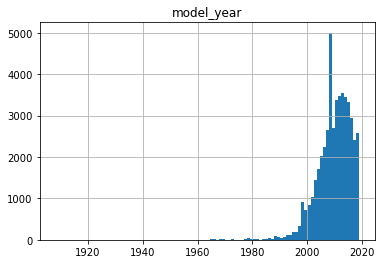

In [2281]:
df.hist('model_year', bins=100)

The histogram shows most of the data centered around the median so this will be our filler

In [2282]:

df['model_year'].fillna(value=df['model_year'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  year_posted   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 5.5+ MB


#### Fixed

### cylinders missing values

Let's see about the cylinders some info and short glimpse on the NaN rows

In [2283]:
df['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

So we have mostly cars with 6 cylinders with majority of the cars in this range. Lets see bar plot for the count of the cylinders to visualize how they distribute 

array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

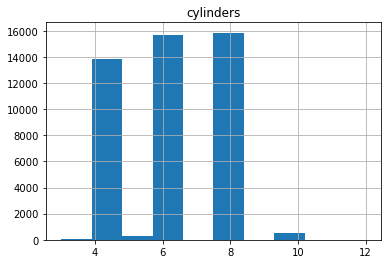

In [2284]:
df.hist('cylinders')

Almost same amount for 6 and 8 cylinders. 4 cylinders is a bit behind but not something very distinctive. The rest are 2, 12 and 5 with tiny amount and 10 with very small also. 
A good thing will be to see what is the proportion of the missing value from the whole. So let's create a variable for the missing rows of cylinders and calculate the proportion

In [2285]:
df_NaN_cylinders = df[df['cylinders'].isna()]

In [2286]:
NaN_cylinders_percentege = round(df_NaN_cylinders.shape[0]/df.shape[0]*100)
print(f'The percentege of the missing cylinders from total is: {NaN_cylinders_percentege}%')

The percentege of the missing cylinders from total is: 10%


10% is not something that we can ignore so removing these row is not an option. 


Can we replace the missing values with number of cylinder base on relation to other parameter? The quantitative parameters that can have relation with cylinders amount are model year and cylinders 

array([[<AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='model_year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='price', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='cylinders', ylabel='model_year'>,
        <AxesSubplot:xlabel='model_year', ylabel='model_year'>,
        <AxesSubplot:xlabel='price', ylabel='model_year'>],
       [<AxesSubplot:xlabel='cylinders', ylabel='price'>,
        <AxesSubplot:xlabel='model_year', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

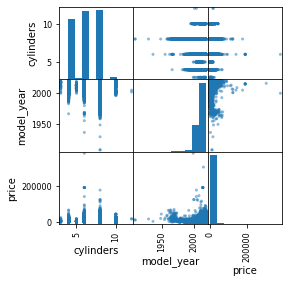

In [2287]:
df_relevant_to_scatter = df[['cylinders', 'model_year', 'price']]
pd.plotting.scatter_matrix(df_relevant_to_scatter, figsize=(4, 4)) 

No relation. 
The last option will be to check if different car model have specific amount of cylinders

In [2288]:
df.groupby(['model', 'cylinders'], dropna=False).median().head(20)

price  model_year  odometer  is_4wd  \
model                        cylinders                                          
acura tl                     4.0         2700.0      2006.0  141750.0     NaN   
                             6.0         5972.5      2007.0  146000.0     1.0   
                             NaN         5490.0      2007.0  127705.0     1.0   
bmw x5                       6.0        10500.0      2011.0  104500.0     1.0   
                             8.0         5000.0      2006.0  134089.0     1.0   
                             NaN         8699.5      2009.0  104517.5     1.0   
buick enclave                4.0         8000.0      2008.0       NaN     NaN   
                             6.0         9990.0      2012.0  109004.0     1.0   
                             8.0        23000.0      2014.0   45000.0     NaN   
                             NaN        11372.5      2012.0  126348.0     1.0   
cadillac escalade            6.0         7500.0      2011.0  192684.0     1.0   
                             8.0        13995.0      2009.0  131000.0     1.0   
                             10.0       14995.0      2011.0  118515.0     1.0   
                             NaN        14130.0      2008.5  108588.5     1.0   
chevrolet camaro             4.0        15995.0      2016.0   45724.5     NaN   
                             6.0        10750.0      2012.0   93644.0     1.0   
                             8.0        19388.5      2011.0   51550.0     1.0   
                             10.0           1.0      2015.5   28926.0     1.0   
                             NaN        15443.5      2013.0   50000.0     1.0   
chevrolet camaro lt coupe 2d 6.0        19700.0      2017.0   28936.0     NaN   

                                        days_listed  year_posted  
model                        cylinders                            
acura tl                     4.0               35.0       2018.0  
                             6.0               35.0       2018.0  
                             NaN               28.0       2018.0  
bmw x5                       6.0               35.0       2018.0  
                             8.0               34.0       2018.0  
                             NaN               29.0       2018.0  
buick enclave                4.0                2.0       2018.0  
                             6.0               34.0       2018.0  
                             8.0               51.0       2019.0  
                             NaN               23.5       2018.0  
cadillac escalade            6.0               52.0       2018.0  
                             8.0               34.0       2018.0  
                             10.0              53.0       2019.0  
                             NaN               36.0       2018.0  
chevrolet camaro             4.0               32.0       2019.0  
                             6.0               31.0       2018.0  
                             8.0               34.0       2018.0  
                             10.0              39.0       2018.0  
                             NaN               34.5       2018.0  
chevrolet camaro lt coupe 2d 6.0               34.0       2018.0

We see that all models have more than one option of cylinders amount. We can't correlate to that.   

Concluding the fact that the cylinders amount disperse evenly on few numbers (4,6 and 8), there is no correlation to numeric values (include price) and we can't classify according to car models we can safely say that we can remove the cylinders column because we can't find a rule for fill up. 

In [2289]:
df.drop(columns='cylinders', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   fuel          51525 non-null  object        
 5   odometer      43633 non-null  float64       
 6   transmission  51525 non-null  object        
 7   type          51525 non-null  object        
 8   paint_color   42258 non-null  object        
 9   is_4wd        25572 non-null  float64       
 10  date_posted   51525 non-null  datetime64[ns]
 11  days_listed   51525 non-null  int64         
 12  year_posted   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 5.1+ MB


#### Fixed - column removed

### odometer missing values

Let's see about the odometer some info and short glimpse on the NaN rows and percentage from total 

In [2290]:
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [2291]:
df['odometer'].head()

0    145000.0
1     88705.0
2    110000.0
3         NaN
4     80903.0
Name: odometer, dtype: float64

In [2292]:
df_NaN_odometer = df[df['odometer'].isna()]
df_NaN_odometer.describe()

,price,model_year,odometer,is_4wd,days_listed,year_posted
count,7892.000000,7892.000000,0.0,3876.0,7892.000000,7892.000000
mean,12113.421059,2009.868474,NaN,1.0,39.223517,2018.306006
std,10250.750279,6.097147,NaN,0.0,28.574748,0.460861
min,1.000000,1908.000000,NaN,1.0,0.000000,2018.000000
25%,5000.000000,2007.000000,NaN,1.0,18.000000,2018.000000
50%,9000.000000,2011.000000,NaN,1.0,33.000000,2018.000000
75%,16900.000000,2014.000000,NaN,1.0,53.000000,2019.000000
max,300000.000000,2019.000000,NaN,1.0,240.000000,2019.000000


In [2293]:
NaN_odometer_percentege = round(df_NaN_odometer.shape[0]/df.shape[0]*100)
print(f'The percentege of the missing odometer from total is: {NaN_odometer_percentege}%')

The percentege of the missing odometer from total is: 15%


We can see that there is a large portion of missing values for the odometer. What can be a gut fit to fill this missing value would be the median of the odometer value per year. We will test this hypothesis with a correlation between the model year to the odometer. We will create a new column for this name - car_age. The hypothesis will be true if with larger car_age will have larger odometer.

0.4552347861682165

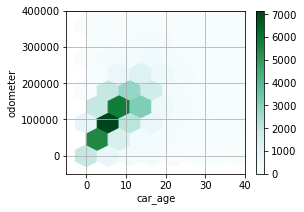

In [2294]:
# 1st change model_year to integer
df['model_year'] = df['model_year'].astype(int)
df['car_age'] = df['year_posted'] - df['model_year']

df.plot(x='car_age', y='odometer', kind='hexbin',
        gridsize=20, figsize=(4, 3), sharex=False,
        grid=True, ylim=(-50000, 400000), xlim=(-5, 40)) 
df['car_age'].corr(df['odometer'])

There is a positive reasonable correlation and the plot shows steady increase with car age. But if we look closely on the plot we can see that the majority of the results fall in odometer = 100,000. A better call will be to assign the mean value to the missing values because most of the cars regardless of the age sold at approximately 100,00.

In [2295]:
df['odometer'].fillna(value=df['odometer'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   fuel          51525 non-null  object        
 5   odometer      51525 non-null  float64       
 6   transmission  51525 non-null  object        
 7   type          51525 non-null  object        
 8   paint_color   42258 non-null  object        
 9   is_4wd        25572 non-null  float64       
 10  date_posted   51525 non-null  datetime64[ns]
 11  days_listed   51525 non-null  int64         
 12  year_posted   51525 non-null  int64         
 13  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(6)
memory usage: 5.3+ MB


0.4185204711224085

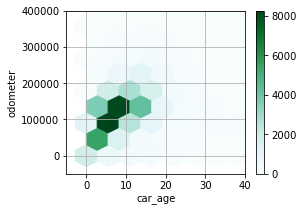

In [2296]:
df.plot(x='car_age', y='odometer', kind='hexbin',
        gridsize=20, figsize=(4, 3), sharex=False,
        grid=True, ylim=(-50000, 400000), xlim=(-5, 40)) 
df['car_age'].corr(df['odometer'])

Fixed and the correlation stayed almost the same.

### paint_color  missing values

Let's see about the paint_color some info and short glimpse on the NaN rows and percentage from total 

In [2297]:
df_NaN_paint_color = df[df['paint_color'].isna()]
df_NaN_paint_color.describe()

,price,model_year,odometer,is_4wd,days_listed,year_posted,car_age
count,9267.000000,9267.000000,9267.000000,4630.0,9267.000000,9267.000000,9267.000000
mean,12170.749541,2009.902018,114714.925740,1.0,39.376821,2018.302255,8.400237
std,9599.841183,6.015099,58570.464619,0.0,28.085425,0.459260,6.029485
min,1.000000,1958.000000,0.000000,1.0,0.000000,2018.000000,0.000000
25%,5197.000000,2007.000000,78243.500000,1.0,19.000000,2018.000000,4.000000
50%,9400.000000,2011.000000,115553.461738,1.0,33.000000,2018.000000,7.000000
75%,16993.000000,2014.000000,144463.500000,1.0,53.000000,2019.000000,12.000000
max,189000.000000,2019.000000,811956.000000,1.0,271.000000,2019.000000,60.000000


In [2298]:
df.describe()

,price,model_year,odometer,is_4wd,days_listed,year_posted,car_age
count,51525.000000,51525.000000,51525.000000,25572.0,51525.00000,51525.000000,51525.000000
mean,12132.464920,2009.838234,115553.461738,1.0,39.55476,2018.307462,8.469229
std,10040.803015,6.065836,59902.205520,0.0,28.20427,0.461447,6.079773
min,1.000000,1908.000000,0.000000,1.0,0.00000,2018.000000,0.000000
25%,5000.000000,2007.000000,79181.000000,1.0,19.00000,2018.000000,4.000000
50%,9000.000000,2011.000000,115553.461738,1.0,33.00000,2018.000000,7.000000
75%,16839.000000,2014.000000,146541.000000,1.0,53.00000,2019.000000,12.000000
max,375000.000000,2019.000000,990000.000000,1.0,271.00000,2019.000000,110.000000


In [2299]:
df_NaN_paint_color.describe(include=object)

,model,condition,fuel,transmission,type,paint_color
count,9267,9267,9267,9267,9267,0
unique,100,6,5,3,13,0
top,ford f-150,excellent,gas,automatic,SUV,NaN
freq,476,4423,8521,8403,2236,NaN


In [2300]:
df.describe(include=object)

,model,condition,fuel,transmission,type,paint_color
count,51525,51525,51525,51525,51525,42258
unique,100,6,5,3,13,12
top,ford f-150,excellent,gas,automatic,SUV,white
freq,2796,24773,47288,46902,12405,10029


We can see the data with absence of color distribute like the general data. In terms on quantitative and qualitative data so the data can't explain why in this fields we have missing data. This is a data missing completely at random (MCAR)  

In [2301]:
df_NaN_paint_color.head()

,price,model_year,model,condition,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,car_age
0,9400,2011,bmw x5,good,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19,2018,7
3,1500,2003,ford f-150,fair,gas,115553.461738,automatic,pickup,NaN,NaN,2019-03-22,9,2019,16
8,11500,2012,kia sorento,excellent,gas,104174.000000,automatic,SUV,NaN,1.0,2018-07-16,19,2018,6
12,18990,2012,ram 1500,excellent,gas,140742.000000,automatic,pickup,NaN,1.0,2019-04-02,37,2019,7
21,5250,2007,toyota rav4,good,gas,154000.000000,automatic,SUV,NaN,NaN,2018-08-22,8,2018,11


In [2302]:
NaN_paint_color_percentege = round(df_NaN_paint_color.shape[0]/df.shape[0]*100)
print(f'The percentege of the missing paint_color from total is: {NaN_paint_color_percentege}%')

The percentege of the missing paint_color from total is: 18%


18% is a lot. We will leave the rows with missing color but will replace the color with unknown since we can't have a good guess of what was dropped and fill up with the most common value will shake the proportion between the colors too much

In [2303]:
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

White - Not surprising. Let's replace

In [2304]:
df['paint_color'].fillna(value='unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   fuel          51525 non-null  object        
 5   odometer      51525 non-null  float64       
 6   transmission  51525 non-null  object        
 7   type          51525 non-null  object        
 8   paint_color   51525 non-null  object        
 9   is_4wd        25572 non-null  float64       
 10  date_posted   51525 non-null  datetime64[ns]
 11  days_listed   51525 non-null  int64         
 12  year_posted   51525 non-null  int64         
 13  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(6)
memory usage: 5.3+ MB


#### Fixed 

### is_4wd  missing values

There are a lot of missing values here. 

In [2305]:
df['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

all the values are 1 that represent boolean for True. So what we don't have is the cars with regular transmission. Let's just have quick glimpse on the car models with and without 4X4 transmission to see if the models variation between the two support it

In [2306]:
df_NaN_is_4wd = df[df['is_4wd'].isna()]
df_is_4wd = df[df['is_4wd'].notna()]


In [2307]:
df_NaN_is_4wd['model'].unique()

array(['hyundai sonata', 'ford f-150', 'chrysler 200', 'toyota camry',
       'honda accord', 'hyundai elantra', 'toyota rav4',
       'chevrolet malibu', 'ford fusion se', 'chevrolet impala',
       'chevrolet corvette', 'toyota camry le', 'nissan altima',
       'toyota highlander', 'dodge charger', 'chrysler 300',
       'toyota tacoma', 'mercedes-benz benze sprinter 2500',
       'toyota 4runner', 'ford focus', 'honda civic', 'kia soul',
       'chevrolet camaro lt coupe 2d', 'chevrolet cruze', 'ford mustang',
       'nissan versa', 'ford f250 super duty', 'chevrolet camaro',
       'ford mustang gt coupe 2d', 'chevrolet colorado',
       'chevrolet silverado', 'honda pilot',
       'nissan frontier crew cab sv', 'kia sorento', 'nissan maxima',
       'chevrolet equinox', 'nissan sentra', 'dodge grand caravan',
       'ford taurus', 'chevrolet silverado 1500', 'acura tl',
       'ford ranger', 'gmc sierra', 'hyundai santa fe', 'nissan rogue',
       'honda civic lx', 'honda odyssey

In [2308]:
df_is_4wd['model'].unique()

array(['bmw x5', 'ford f-150', 'chrysler 300', 'honda pilot',
       'kia sorento', 'chevrolet silverado 1500', 'ram 1500', 'gmc yukon',
       'jeep cherokee', 'chevrolet traverse', 'chevrolet tahoe',
       'chevrolet silverado', 'jeep wrangler', 'jeep liberty',
       'subaru outback', 'chevrolet equinox', 'nissan rogue',
       'honda cr-v', 'jeep grand cherokee', 'dodge charger',
       'chevrolet colorado', 'ford f150 supercrew cab xlt',
       'chevrolet silverado 3500hd', 'nissan frontier crew cab sv',
       'subaru impreza', 'jeep grand cherokee laredo', 'toyota 4runner',
       'ford f-250 sd', 'chevrolet silverado 1500 crew', 'toyota rav4',
       'subaru forester', 'ford explorer', 'ford f-350 sd', 'ford edge',
       'ford f-250', 'ford f150', 'chevrolet suburban', 'ford expedition',
       'ford f350 super duty', 'ford ranger', 'toyota tacoma',
       'ford escape', 'gmc sierra 2500hd', 'gmc sierra 1500',
       'cadillac escalade', 'toyota camry', 'hyundai sonata',
    

It's not what we were hoping to see. How come jeep cherokee have NaN on the is_4wd? We was about to change all these cells to 0 to represent 2wd but some of the cars in the series of the df_NaN_is_4wd are legit off road cars with definitely 4x4 transmission.  

In [2309]:
df_is_4wd.describe()

,price,model_year,odometer,is_4wd,days_listed,year_posted,car_age
count,25572.000000,25572.000000,25572.000000,25572.0,25572.000000,25572.000000,25572.000000
mean,15320.227514,2010.094087,117567.475313,1.0,39.611685,2018.306312,8.212224
std,11234.442437,5.583050,60243.094246,0.0,28.081845,0.460970,5.596845
min,1.000000,1965.000000,0.000000,1.0,0.000000,2018.000000,0.000000
25%,6950.000000,2007.000000,81000.000000,1.0,19.000000,2018.000000,4.000000
50%,13400.000000,2011.000000,115553.461738,1.0,33.000000,2018.000000,7.000000
75%,21900.000000,2014.000000,150000.000000,1.0,53.000000,2019.000000,12.000000
max,375000.000000,2019.000000,980000.000000,1.0,263.000000,2019.000000,53.000000


In [2310]:
df_NaN_is_4wd.describe()

,price,model_year,odometer,is_4wd,days_listed,year_posted,car_age
count,25953.000000,25953.000000,25953.000000,0.0,25953.000000,25953.000000,25953.000000
mean,8991.499904,2009.586136,113569.014655,NaN,39.498671,2018.308596,8.722460
std,7477.993220,6.496851,59498.928981,NaN,28.324809,0.461923,6.510916
min,1.000000,1908.000000,0.000000,NaN,0.000000,2018.000000,0.000000
25%,4400.000000,2007.000000,78000.000000,NaN,19.000000,2018.000000,5.000000
50%,6995.000000,2011.000000,115553.461738,NaN,33.000000,2018.000000,7.000000
75%,11800.000000,2014.000000,143200.000000,NaN,53.000000,2019.000000,12.000000
max,189000.000000,2019.000000,990000.000000,NaN,271.000000,2019.000000,110.000000


In [2311]:
df_is_4wd.describe(include=object)

,model,condition,fuel,transmission,type,paint_color
count,25572,25572,25572,25572,25572,25572
unique,94,6,5,3,12,13
top,ford f-150,excellent,gas,automatic,truck,white
freq,2048,12742,22409,23421,9357,5385


In [2312]:
df_NaN_is_4wd.describe(include=object)

,model,condition,fuel,transmission,type,paint_color
count,25953,25953,25953,25953,25953,25953
unique,100,6,5,3,13,13
top,toyota camry,excellent,gas,automatic,sedan,white
freq,976,12031,24879,23481,11591,4644


We see that the most common 4wd car type is truck and for the rest it's sedan. This make sense. Maybe we can find correlation with the car type

We will calculate the ratio of car models for the whole data, the data with no info about wheels transmission and the data with 4wd

In [2313]:
df_is_4wd_type_count = df_is_4wd['type'].value_counts() 
df_is_4wd_type_ratio =  df_is_4wd_type_count / len(df_is_4wd)
df_is_4wd_type_count_ratio = pd.concat([df_is_4wd_type_count,
                                        df_is_4wd_type_ratio],
                                       axis=1)
df_is_4wd_type_count_ratio.columns = [['count', 'ratio']]

df_NaN_is_4wd_type_count = df_NaN_is_4wd['type'].value_counts() 
df_NaN_is_4wd_type_ratio =  df_NaN_is_4wd_type_count / len(df_NaN_is_4wd)
df_NaN_is_4wd_type_count_ratio = pd.concat([df_NaN_is_4wd_type_count,
                                        df_NaN_is_4wd_type_ratio],
                                       axis=1)
df_NaN_is_4wd_type_count_ratio.columns = [['count', 'ratio']]

df_type_count = df['type'].value_counts() 
df_type_ratio =  df_type_count / len(df)
df_type_count_ratio = pd.concat([df_type_count,
                                        df_type_ratio],
                                       axis=1)
df_type_count_ratio.columns = [['count', 'ratio']]

In [2314]:
df_is_4wd_type_count_ratio

,count,ratio
truck,9357,0.365908
SUV,8853,0.346199
pickup,5026,0.196543
wagon,1073,0.041960
sedan,563,0.022016
offroad,206,0.008056
hatchback,160,0.006257
other,126,0.004927
coupe,76,0.002972
convertible,53,0.002073


In [2315]:
df_type_count_ratio

,count,ratio
SUV,12405,0.240757
truck,12353,0.239748
sedan,12154,0.235885
pickup,6988,0.135623
coupe,2303,0.044697
wagon,1541,0.029908
mini-van,1161,0.022533
hatchback,1047,0.020320
van,633,0.012285
convertible,446,0.008656


In [2316]:
df_NaN_is_4wd_type_count_ratio

,count,ratio
sedan,11591,0.446615
SUV,3552,0.136863
truck,2996,0.115439
coupe,2227,0.085809
pickup,1962,0.075598
mini-van,1122,0.043232
hatchback,887,0.034177
van,593,0.022849
wagon,468,0.018033
convertible,393,0.015143


Our guess looks promise. With almost double proportion for truck and SUV in the 4wd category we can rest assured the cars in the category is_4wd = 1 are 4x4. But what about the rest? It's not looks reasonable that all the rest cars includ lots and lots of trucks and SUV are all 2x4. Especially when we remember all the types of jeep cherokee in the NaN is_4wd. We can think about a compensation to assign for all the SUV and truck a 4x4 but what about the part of sedan with 4x4? we cannot leave all the rest untouched and yet we cannot assign arbitrary values of 1 or 0 because this is not something we can do with boolean value. Therefore, unfortunately we will have to remove this column and not address the 4wd parameter on the price affect.      

In [2317]:
df.drop(columns='is_4wd', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   fuel          51525 non-null  object        
 5   odometer      51525 non-null  float64       
 6   transmission  51525 non-null  object        
 7   type          51525 non-null  object        
 8   paint_color   51525 non-null  object        
 9   date_posted   51525 non-null  datetime64[ns]
 10  days_listed   51525 non-null  int64         
 11  year_posted   51525 non-null  int64         
 12  car_age       51525 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(6)
memory usage: 4.9+ MB


#### Fixed - column removed

## Fix data types

In [2318]:
df['odometer'] = df['odometer'].astype(int)

## Enrich data

In [2319]:
df.head()

,price,model_year,model,condition,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,year_posted,car_age
0,9400,2011,bmw x5,good,gas,145000,automatic,SUV,unknown,2018-06-23,19,2018,7
1,25500,2011,ford f-150,good,gas,88705,automatic,pickup,white,2018-10-19,50,2018,7
2,5500,2013,hyundai sonata,like new,gas,110000,automatic,sedan,red,2019-02-07,79,2019,6
3,1500,2003,ford f-150,fair,gas,115553,automatic,pickup,unknown,2019-03-22,9,2019,16
4,14900,2017,chrysler 200,excellent,gas,80903,automatic,sedan,black,2019-04-02,28,2019,2


[Add additional factors to the data to make the analysis easier.]

In [2320]:
# Add datetime values for when the ad was placed

Done in previous section.

In [2321]:
# Add the vehicle's age when the ad was placed

Done in previous section.

In [2322]:
# Add the vehicle's average mileage per year
df['average_mileage_per_year'] = df['odometer'] / df['car_age']
df.info()
# df['average_mileage_per_year'] = df['average_mileage_per_year'].astype(int)
# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     51525 non-null  int64         
 1   model_year                51525 non-null  int32         
 2   model                     51525 non-null  object        
 3   condition                 51525 non-null  object        
 4   fuel                      51525 non-null  object        
 5   odometer                  51525 non-null  int32         
 6   transmission              51525 non-null  object        
 7   type                      51525 non-null  object        
 8   paint_color               51525 non-null  object        
 9   date_posted               51525 non-null  datetime64[ns]
 10  days_listed               51525 non-null  int64         
 11  year_posted               51525 non-null  int64         
 12  car_age           

What happen to 2 values?

In [2323]:
df_NaN_average_mileage_per_year = df[df['average_mileage_per_year'].isna()]
df_NaN_average_mileage_per_year

,price,model_year,model,condition,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,year_posted,car_age,average_mileage_per_year
17037,45400,2018,ram 3500,excellent,diesel,0,automatic,pickup,black,2018-12-16,18,2018,0,NaN
40489,15900,2018,toyota prius,excellent,hybrid,0,automatic,hatchback,blue,2018-07-30,31,2018,0,NaN


We will catch this exception and for places where the car with no mileage we will assign the read of the odometer (which is equal to 0) 

In [2324]:
try:
    df['average_mileage_per_year'] = df['average_mileage_per_year'].astype(int)
except:
    df['average_mileage_per_year'] = df['odometer']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     51525 non-null  int64         
 1   model_year                51525 non-null  int32         
 2   model                     51525 non-null  object        
 3   condition                 51525 non-null  object        
 4   fuel                      51525 non-null  object        
 5   odometer                  51525 non-null  int32         
 6   transmission              51525 non-null  object        
 7   type                      51525 non-null  object        
 8   paint_color               51525 non-null  object        
 9   date_posted               51525 non-null  datetime64[ns]
 10  days_listed               51525 non-null  int64         
 11  year_posted               51525 non-null  int64         
 12  car_age           

Let's replace the condition values with something that can be manipulated more easily
Start by check the values of condition 

In [2325]:
df['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

Create a function to replace condition text with numerical values

In [2326]:
def create_condition_rank(condition:str):
    dict = {
        'salvage': 0,
        'fair': 1,
        'good': 2,
        'excellent': 3,
        'like new': 4,
        'new': 5,
        
    }
    
    return dict[condition]

Add new column with condition_rank

In [2327]:
df['condition_rank'] = df['condition'].apply(create_condition_rank)

## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [2328]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     51525 non-null  int64         
 1   model_year                51525 non-null  int32         
 2   model                     51525 non-null  object        
 3   condition                 51525 non-null  object        
 4   fuel                      51525 non-null  object        
 5   odometer                  51525 non-null  int32         
 6   transmission              51525 non-null  object        
 7   type                      51525 non-null  object        
 8   paint_color               51525 non-null  object        
 9   date_posted               51525 non-null  datetime64[ns]
 10  days_listed               51525 non-null  int64         
 11  year_posted               51525 non-null  int64         
 12  car_age           

In [2329]:
# print a sample of data
df.head()

,price,model_year,model,condition,fuel,odometer,transmission,type,paint_color,date_posted,days_listed,year_posted,car_age,average_mileage_per_year,condition_rank
0,9400,2011,bmw x5,good,gas,145000,automatic,SUV,unknown,2018-06-23,19,2018,7,145000,2
1,25500,2011,ford f-150,good,gas,88705,automatic,pickup,white,2018-10-19,50,2018,7,88705,2
2,5500,2013,hyundai sonata,like new,gas,110000,automatic,sedan,red,2019-02-07,79,2019,6,110000,4
3,1500,2003,ford f-150,fair,gas,115553,automatic,pickup,unknown,2019-03-22,9,2019,16,115553,1
4,14900,2017,chrysler 200,excellent,gas,80903,automatic,sedan,black,2019-04-02,28,2019,2,80903,3


Looking good

## Study core parameters
The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

To have better understanding of the core parameters let's plot scatter matrix and correlation matrix

In [2330]:
core_parameters_df = df[['price', 'car_age', 'odometer', 'condition_rank']]

In [2331]:
core_parameters_df.corr()

,price,car_age,odometer,condition_rank
price,1.000000,-0.412626,-0.385297,0.221518
car_age,-0.412626,1.000000,0.418520,-0.270515
odometer,-0.385297,0.418520,1.000000,-0.273071
condition_rank,0.221518,-0.270515,-0.273071,1.000000


There is correlation between the distance the car traveled to the reduction of the price and even better correlation with the car age 

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='car_age', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='car_age'>,
        <AxesSubplot:xlabel='car_age', ylabel='car_age'>,
        <AxesSubplot:xlabel='odometer', ylabel='car_age'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='car_age'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='car_age', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='car_age', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='condition_rank'>]],
      dtype=object)

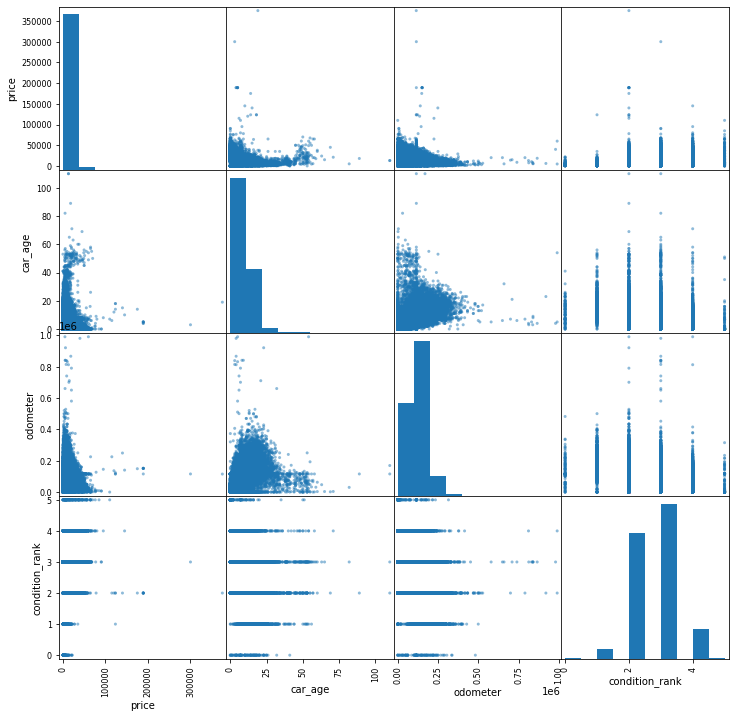

In [2332]:
pd.plotting.scatter_matrix(core_parameters_df, figsize=(12, 12)) 

In the upper row we can see that for all 3 metrics there are lots of low price values. We will explore it to see if there is something in the data we can clean. For this chapter we will now check if different car condition have effect on price

In [2333]:
core_parameters_df['condition_rank'].value_counts()

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition_rank, dtype: int64

We see that the majority of the conditions are 2 and 3 ( good and excellent ). 

Let's see how the price affect by the two most correlate parameters - age and odometer for each car condition

In [2334]:
def create_scatter_plot_for_car_age_vs_price(condition_rank:int, x_axis:str):
    core_parameters_df.query(f'condition_rank == {condition_rank}').plot(
    kind='scatter', x=x_axis, y='price',
    title =f'condition_rank == {condition_rank}',
    figsize=(6, 3))
    

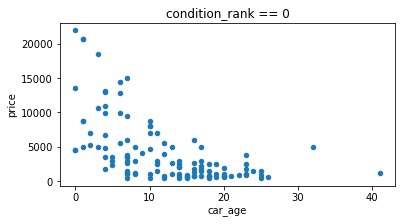

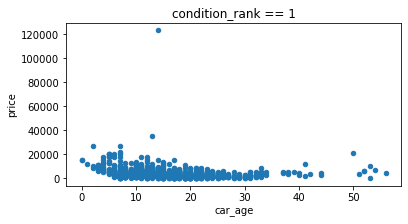

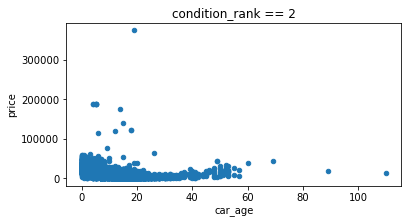

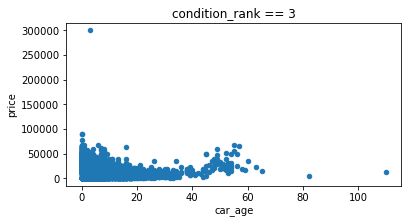

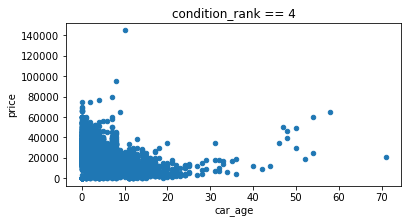

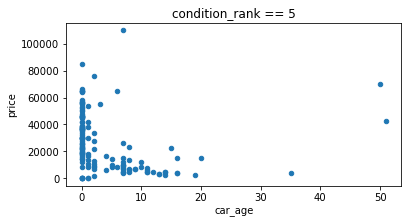

In [2335]:
for condition in range(6):
    create_scatter_plot_for_car_age_vs_price(condition_rank=condition, x_axis='car_age')

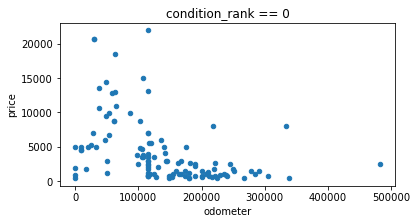

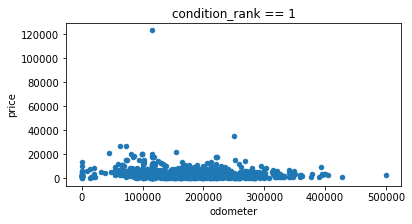

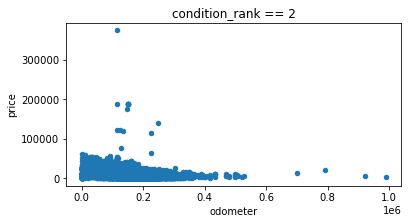

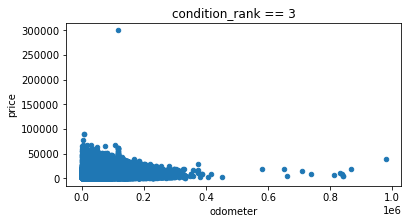

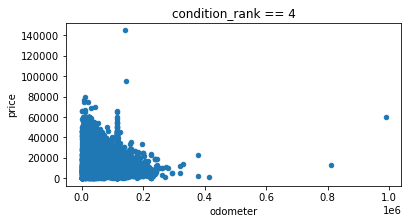

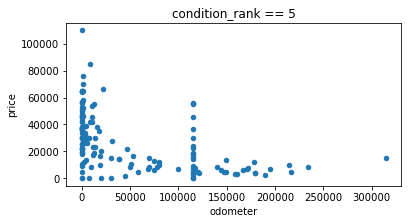

In [2336]:
for condition in range(6):
    create_scatter_plot_for_car_age_vs_price(condition_rank=condition, x_axis='odometer')

It's difficult to see with outliers of high and low prices and extremely old car ages and high read of odometer. We will treat this in next chapter.

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

#### Price
Start with low prices. Let's see if there is something we can treat.

<AxesSubplot:>

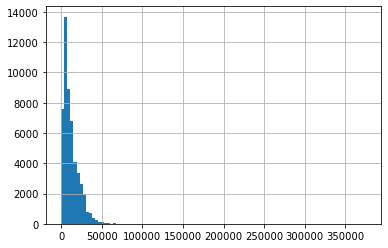

In [2337]:
df['price'].hist(bins=100)

Hard to tell what is going on but it's clear that a lot of the values are very low. lets create data frame with price < 10,000

<AxesSubplot:>

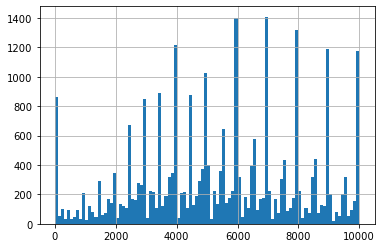

In [2338]:
df.query('price < 10000')['price'].hist(bins=100)

We can see two interesting here
1. People tend to use round prices this is why we see these spikes
2. there is a large column near 0. We will explore it in the next chapter

<AxesSubplot:>

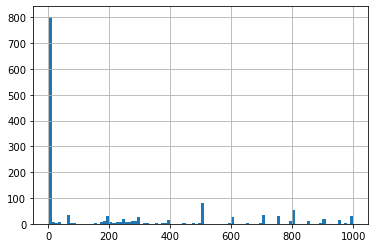

In [2339]:
df.query('price < 1000')['price'].hist(bins=100)

In [2340]:
df.query('price < 1000')['price'].value_counts()[:10]

1      798
500     79
800     53
700     35
69      34
750     29
600     26
900     18
995     17
299     17
Name: price, dtype: int64

There are two problematic low values here: 1 and 69. 
For 1 our guess is that the users couldn't put 0 in price area so they use 1. It's common that people don't use price in listing like this and they intend to provide the price on the phone. For our purpose this case is not relevant because we need price so we will delete the rows with 1.
For 69 our guess is that people add this number as a not very funny joke. We will delete the rows with 69.

In [2341]:
no_outliers_df = df.query('price != 1 and price != 69')
only_outliers_df = df.query('price == 1 and price == 69')

Now we will check for high prices with bxplot

First quartile: 5300.0
Third quartile: 16950.0


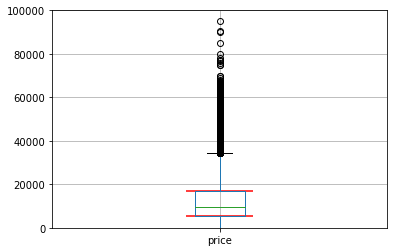

In [2342]:
Q1 = no_outliers_df['price'].quantile(0.25)
Q3 = no_outliers_df['price'].quantile(0.75)
print("First quartile:", Q1)
print("Third quartile:", Q3) 

plt.ylim(0, 100000)
no_outliers_df.boxplot(column='price')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')

In [2343]:
no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50693 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     50693 non-null  int64         
 1   model_year                50693 non-null  int32         
 2   model                     50693 non-null  object        
 3   condition                 50693 non-null  object        
 4   fuel                      50693 non-null  object        
 5   odometer                  50693 non-null  int32         
 6   transmission              50693 non-null  object        
 7   type                      50693 non-null  object        
 8   paint_color               50693 non-null  object        
 9   date_posted               50693 non-null  datetime64[ns]
 10  days_listed               50693 non-null  int64         
 11  year_posted               50693 non-null  int64         
 12  car_age           

For our study we will remove high price outliers. The enormous extent the high priceses exceeds the whiskers by a lot. It can be interesting to explore the luxury Cars with high prices but it can't be in the same study as for mass production popular used cars.  

In [2344]:
no_outliers_df = no_outliers_df.query('price <= 50000')
only_outliers_df = only_outliers_df.query('price > 50000')

In [2345]:
no_outliers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50466 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     50466 non-null  int64         
 1   model_year                50466 non-null  int32         
 2   model                     50466 non-null  object        
 3   condition                 50466 non-null  object        
 4   fuel                      50466 non-null  object        
 5   odometer                  50466 non-null  int32         
 6   transmission              50466 non-null  object        
 7   type                      50466 non-null  object        
 8   paint_color               50466 non-null  object        
 9   date_posted               50466 non-null  datetime64[ns]
 10  days_listed               50466 non-null  int64         
 11  year_posted               50466 non-null  int64         
 12  car_age           

#### Odometer
Now we will check if there are odometer outliers

First quartile: 81861.75
Third quartile: 147821.0


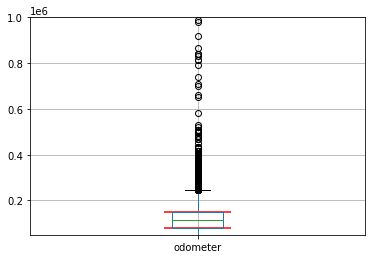

In [2346]:
Q1 = no_outliers_df['odometer'].quantile(0.25)
Q3 = no_outliers_df['odometer'].quantile(0.75)
print("First quartile:", Q1)
print("Third quartile:", Q3) 

plt.ylim(50000, 1000000)
no_outliers_df.boxplot(column='odometer')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')

Most of the cars traveled much less than 400,000 miles. Let's remove the outliers. Cars with such high odometer don't represent the common second hand cars.

In [2347]:
no_outliers_df = no_outliers_df.query('odometer <= 400000')
only_outliers_df = only_outliers_df.query('odometer > 400000')

#### Car age
Now we will check if there are car_age outliers

First quartile: 4.0
Third quartile: 12.0


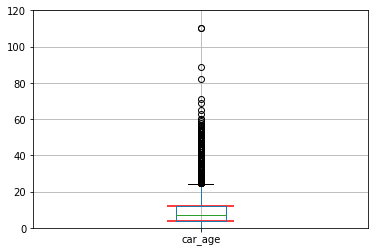

In [2348]:
Q1 = no_outliers_df['car_age'].quantile(0.25)
Q3 = no_outliers_df['car_age'].quantile(0.75)
print("First quartile:", Q1)
print("Third quartile:", Q3) 

plt.ylim(0, 120)
no_outliers_df.boxplot(column='car_age')
plt.hlines(y=[Q1, Q3], xmin=0.9, xmax=1.1, color='red')

Most of the age less than 30 years. Let's remove the outliers. Cars such old don't represent the common second hand cars.

In [2349]:
no_outliers_df = no_outliers_df.query('car_age <= 30')
only_outliers_df = only_outliers_df.query('car_age > 30')

In [2350]:
# profile = ProfileReport(df, title='Report')
# display(profile)

## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

In [2351]:
core_parameters_no_outliers_df = no_outliers_df[['price', 'car_age', 'odometer', 'condition_rank']]

In [2352]:
core_parameters_no_outliers_df.corr()

,price,car_age,odometer,condition_rank
price,1.000000,-0.558829,-0.455798,0.241455
car_age,-0.558829,1.000000,0.504871,-0.288493
odometer,-0.455798,0.504871,1.000000,-0.272862
condition_rank,0.241455,-0.288493,-0.272862,1.000000


We can see improved correlation between car age and odometer to price

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='car_age', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='car_age'>,
        <AxesSubplot:xlabel='car_age', ylabel='car_age'>,
        <AxesSubplot:xlabel='odometer', ylabel='car_age'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='car_age'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='car_age', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='car_age', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition_rank'>,
        <AxesSubplot:xlabel='condition_rank', ylabel='condition_rank'>]],
      dtype=object)

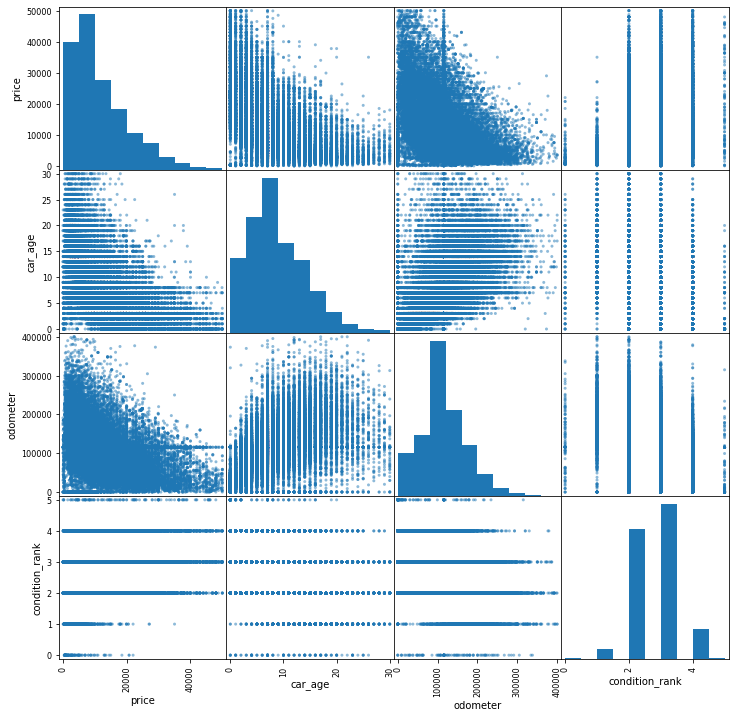

In [2353]:
pd.plotting.scatter_matrix(core_parameters_no_outliers_df, figsize=(12, 12)) 

The histograms now are much more readable with distribution that make sense. 
Steady decline in price, steep increase in car age to the median of little less then 10 years steep increase in odometer to the median of approximately 100,000 miles.
Now we can also see the improved correlation between car age and odometer to price in the scatter plot.

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

To study the ads lifetime we will start by viewing the histogram and some insights about this data

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

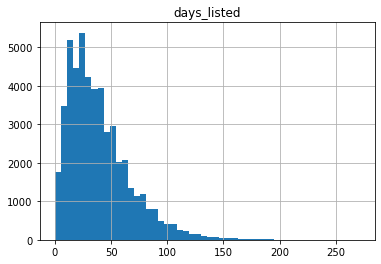

In [2354]:
no_outliers_df.hist('days_listed', bins=50)

Run another histogram for short time listed

array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

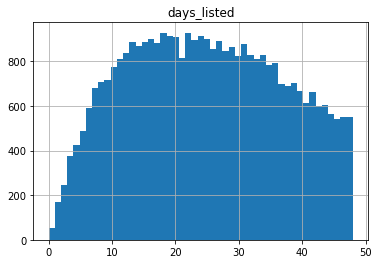

In [2369]:
no_outliers_df.query('days_listed < 49').hist('days_listed', bins=49)

The histogram looks reasonable with no unexplained spikes. Only thing we can see is that there are some very small amount of very long time listing  

In [2356]:
no_outliers_df['days_listed'].describe()

count    50086.000000
mean        39.558959
std         28.208186
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Here we see that the mean is larger than the median. Probably because of extremely long duration listing ads. To study deeply we will divide into 3 groups in a new column 'days_listed_range'. 
'short' for 0-49 days
'medium' for 50-99 days
'long' for 100 to infinity (actually 271) days

In [2357]:
def create_days_listing_range(days_listed:int) -> str:
    if days_listed < 50:
        return 'short'
    elif days_listed < 100:
        return 'medium'
    else:
        return 'long'

In [2358]:
no_outliers_df['days_listed_range'] = no_outliers_df['days_listed'].apply(
    create_days_listing_range)

We will start checking in the different categories to determine when ads were removed quickly, and when they were listed for an abnormally long time. Start by qualitative values.

#### condition

<AxesSubplot:xlabel='condition'>

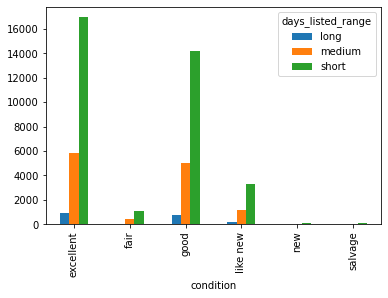

In [2359]:
no_outliers_df.pivot_table(
    index='days_listed_range',
    columns='condition',
    values='condition_rank',
    aggfunc='count'
).transpose().plot(kind='bar')

The most abundant is the short in all cars condition with similar proportion

#### Fuel

<AxesSubplot:xlabel='fuel'>

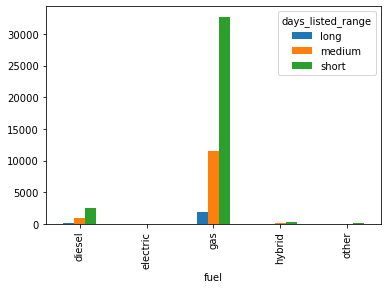

In [2360]:
no_outliers_df.pivot_table(
    index='days_listed_range',
    columns='fuel',
    values='condition_rank',
    aggfunc='count'
).transpose().plot(kind='bar')

There is no need to test by type of fuel because in almost all cases it is a gas engine 

#### Transmission

<AxesSubplot:xlabel='transmission'>

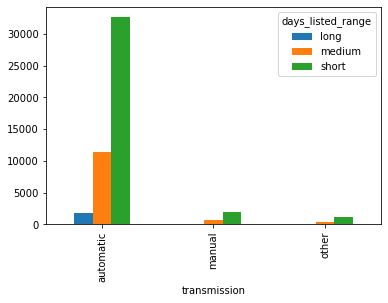

In [2361]:
no_outliers_df.pivot_table(
    index='days_listed_range',
    columns='transmission',
    values='condition_rank',
    aggfunc='count'
).transpose().plot(kind='bar')

There is no need to test by type of transmission because in almost all cases it is a automatic and with the little amount of manual and others the proportion of much more cars sold fast kept the same.

#### Type

<AxesSubplot:xlabel='type'>

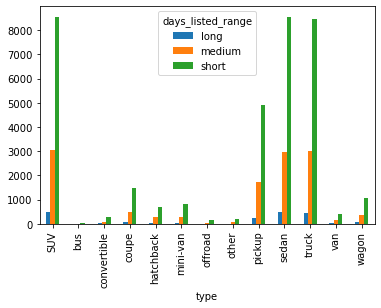

In [2362]:
no_outliers_df.pivot_table(
    index='days_listed_range',
    columns='type',
    values='condition_rank',
    aggfunc='count'
).transpose().plot(kind='bar')

There is nothing significant here also

#### Paint

<AxesSubplot:xlabel='paint_color'>

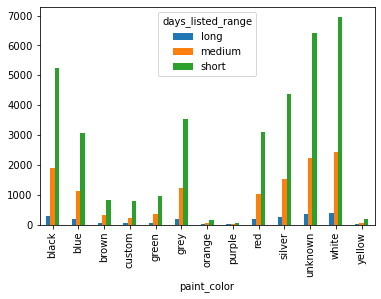

In [2363]:
no_outliers_df.pivot_table(
    index='days_listed_range',
    columns='paint_color',
    values='condition_rank',
    aggfunc='count'
).transpose().plot(kind='bar')

There is no color that looks like a sale killer.

All qualitative values lead to no conclusion. Let's check now the quantitative values

For qualitative we can use the original days_listed column and check the correlation of this metric to the other qualitative values: price, odometer and car age.

In [2364]:
qualitative_no_outliers_df = no_outliers_df[['price', 'odometer', 'days_listed', 'car_age']]

In [2365]:
qualitative_no_outliers_df.corr()

,price,odometer,days_listed,car_age
price,1.000000,-0.455798,-0.001576,-0.558829
odometer,-0.455798,1.000000,0.004482,0.504871
days_listed,-0.001576,0.004482,1.000000,0.003422
car_age,-0.558829,0.504871,0.003422,1.000000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='days_listed', ylabel='price'>,
        <AxesSubplot:xlabel='car_age', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='days_listed', ylabel='odometer'>,
        <AxesSubplot:xlabel='car_age', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='days_listed'>,
        <AxesSubplot:xlabel='odometer', ylabel='days_listed'>,
        <AxesSubplot:xlabel='days_listed', ylabel='days_listed'>,
        <AxesSubplot:xlabel='car_age', ylabel='days_listed'>],
       [<AxesSubplot:xlabel='price', ylabel='car_age'>,
        <AxesSubplot:xlabel='odometer', ylabel='car_age'>,
        <AxesSubplot:xlabel='days_listed', ylabel='car_age'>,
        <AxesSubplot:xlabel='car_age', ylabel='car_age'>]], dtype=object)

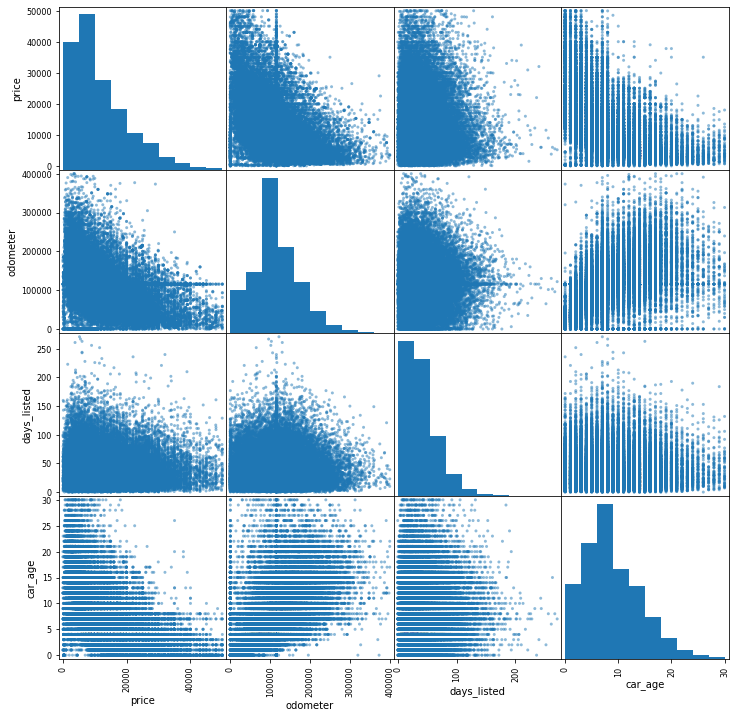

In [2366]:
pd.plotting.scatter_matrix(qualitative_no_outliers_df, figsize=(12, 12)) 

There is no correlation to any of the qualitative metric

For conclusion about this chapter we can say that the reason qualitative data looks like they correlate with days_listed is just because the quantity dispersion of their values is the same (same shape of histogram. The qualitative show no relation to the days listed and that means that we can't explain why an ad was posted longer than the other.

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]